https://learn.theprogrammingfoundation.org/getting_started/intro_data_science/module2/?gclid=Cj0KCQjwteOaBhDuARIsADBqRei3iJwUqjUX3JYvBTgq9BTjIAi4Hx7ngclSH64VwQjjnENtoXJz5xsaAmVzEALw_wcB




In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv("data.csv")

**Her bir feature için NaN değer var mı diye dataframe'i kontrol ediyorum.**

In [97]:
count_nan = df.isnull().sum()
print(count_nan.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Tek bir değere sahip olan featureları siliyorum.**

In [98]:
for col in df.columns:
    print(col,df[col].nunique())
    if(df[col].nunique() == 1):
        df.drop(col,inplace=True, axis=1)

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [99]:
for col in df:
    if(len(df[col].unique()) <= 10):
        print(col,df[col].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
Education [2 1 4 3 5]
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction [2 3 4 1]
Gender ['Female' 'Male']
JobInvolvement [3 2 4 1]
JobLevel [2 1 3 4 5]
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction [4 2 3 1]
MaritalStatus ['Single' 'Married' 'Divorced']
NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3]
OverTime ['Yes' 'No']
PerformanceRating [3 4]
RelationshipSatisfaction [1 4 2 3]
StockOptionLevel [0 1 3 2]
TrainingTimesLastYear [0 3 2 5 1 4 6]
WorkLifeBalance [1 3 2 4]


In [100]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0, 'Married':1,'Divorced':0.5})


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}

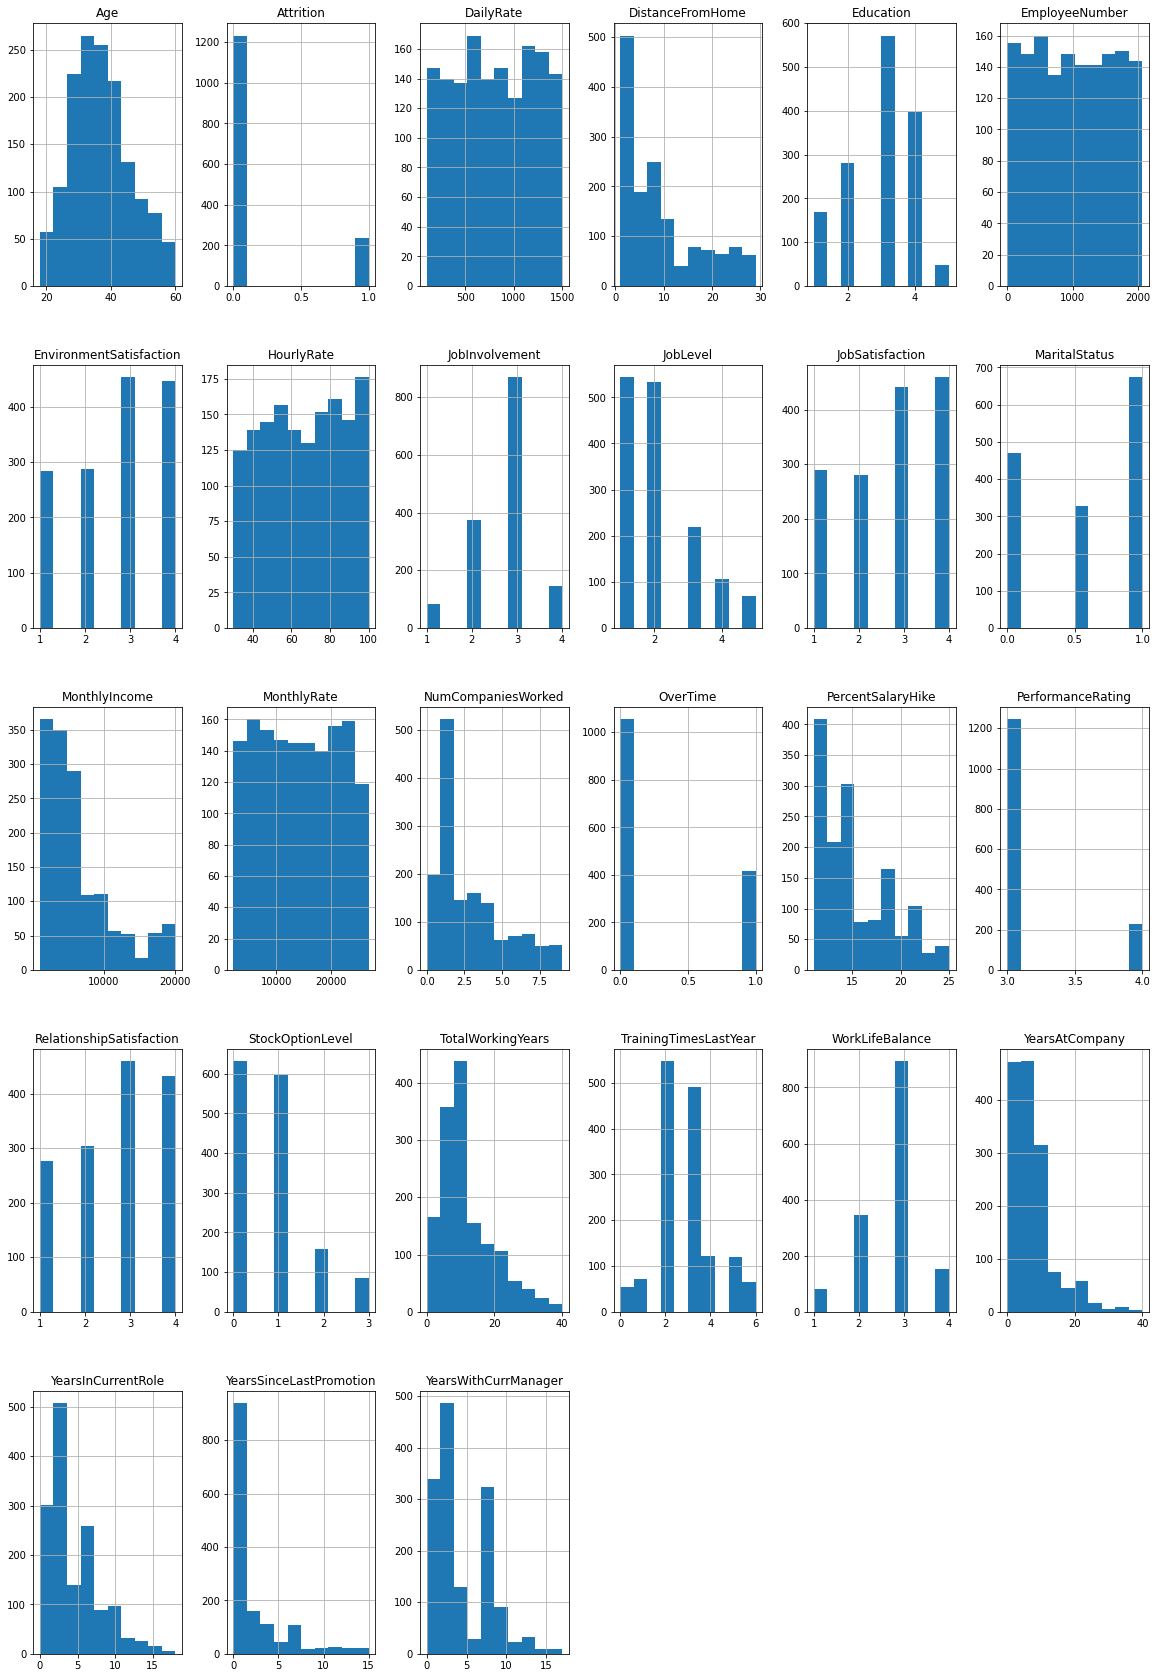

In [101]:
#df.plot(subplots=True, figsize=(20,200));
df[df.columns].hist(layout=(5,6), figsize=(20,30))

**EmployeeNumber feature olarak bize bir şey katmadığı için onu da kaldırıyorum.**

In [102]:
df.drop("EmployeeNumber",inplace = True, axis = 1)

In [103]:
df.describe().astype(int)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,...,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
mean,36,0,802,9,2,2,65,2,2,2,...,3,2,0,11,2,2,7,4,2,4
std,9,0,403,8,1,1,20,0,1,1,...,0,1,0,7,1,0,6,3,3,3
min,18,0,102,1,1,1,30,1,1,1,...,3,1,0,0,0,1,0,0,0,0
25%,30,0,465,2,2,2,48,2,1,2,...,3,2,0,6,2,2,3,2,0,2
50%,36,0,802,7,3,3,66,3,2,3,...,3,3,1,10,3,3,5,3,1,3
75%,43,0,1157,14,4,4,83,3,3,4,...,3,4,1,15,3,3,9,7,3,7
max,60,1,1499,29,5,4,100,4,5,4,...,4,4,3,40,6,4,40,18,15,17


In [104]:
cor_matrix = df.corr().abs()

In [105]:
for col in cor_matrix.columns:
    print("Correlations with",col)
    print(cor_matrix[col])
    print("---------------------------")

Correlations with Age
Age                         1.000000
Attrition                   0.159205
DailyRate                   0.010661
DistanceFromHome            0.001686
Education                   0.208034
EnvironmentSatisfaction     0.010146
HourlyRate                  0.024287
JobInvolvement              0.029820
JobLevel                    0.509604
JobSatisfaction             0.004892
MaritalStatus               0.111831
MonthlyIncome               0.497855
MonthlyRate                 0.028051
NumCompaniesWorked          0.299635
OverTime                    0.028062
PercentSalaryHike           0.003634
PerformanceRating           0.001904
RelationshipSatisfaction    0.053535
StockOptionLevel            0.037510
TotalWorkingYears           0.680381
TrainingTimesLastYear       0.019621
WorkLifeBalance             0.021490
YearsAtCompany              0.311309
YearsInCurrentRole          0.212901
YearsSinceLastPromotion     0.216513
YearsWithCurrManager        0.202089
Name: Age, dtype

In [106]:
for col in cor_matrix.columns:
    for another_col in cor_matrix:
        if cor_matrix[col][another_col] >= 0.7:
            if(col != another_col):
                print(col,another_col,cor_matrix[col][another_col])

JobLevel MonthlyIncome 0.9502999134798473
JobLevel TotalWorkingYears 0.7822078045362748
MonthlyIncome JobLevel 0.9502999134798473
MonthlyIncome TotalWorkingYears 0.7728932462543574
PercentSalaryHike PerformanceRating 0.7735499964012664
PerformanceRating PercentSalaryHike 0.7735499964012664
TotalWorkingYears JobLevel 0.7822078045362748
TotalWorkingYears MonthlyIncome 0.7728932462543574
YearsAtCompany YearsInCurrentRole 0.7587537366134619
YearsAtCompany YearsWithCurrManager 0.7692124251007031
YearsInCurrentRole YearsAtCompany 0.7587537366134619
YearsInCurrentRole YearsWithCurrManager 0.7143647616385931
YearsWithCurrManager YearsAtCompany 0.7692124251007031
YearsWithCurrManager YearsInCurrentRole 0.7143647616385931


**Yukarıda tüm attributelar için aralarındaki korelasyonları ölçtüm ve 0.7'den büyük olanları print ettim. Arasında korelasyon fazla olan att'lerden biri kaldırılmalı.**
https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

https://towardsdatascience.com/improve-your-ml-model-by-trying-different-approaches-582f4dda7eee

https://piazza.com/class_profile/get_resource/l80w2wou9l84rc/l9lx8tiladp3e1
Bu linklerden devam et.

In [107]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [108]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']


**Yukarıdaki featureları dataframe üzerinden kaldırıyoruz. Çünkü aralarında çok yüksek korelasyon var ve JobLevel tek başına bu beşinin yerine kullanılabilir.**

In [109]:
df1 = df.drop(to_drop, axis=1)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,19479,8,1,11,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,24907,1,0,23,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2396,6,1,15,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,23159,1,1,11,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,16632,9,0,12,4,1,3,3,2,2


In [110]:
from numpy import unique

for col in df1.columns:
    num = len(df1[col].unique())
    percentage = float(num) / df1.shape[0] * 100
    print(col,"%.2f" %percentage)

Age 2.93
Attrition 0.14
BusinessTravel 0.20
DailyRate 60.27
Department 0.20
DistanceFromHome 1.97
Education 0.34
EducationField 0.41
EnvironmentSatisfaction 0.27
Gender 0.14
HourlyRate 4.83
JobInvolvement 0.27
JobLevel 0.34
JobRole 0.61
JobSatisfaction 0.27
MaritalStatus 0.20
MonthlyRate 97.07
NumCompaniesWorked 0.68
OverTime 0.14
PercentSalaryHike 1.02
RelationshipSatisfaction 0.27
StockOptionLevel 0.27
TrainingTimesLastYear 0.48
WorkLifeBalance 0.27
YearsAtCompany 2.52
YearsSinceLastPromotion 1.09


**Duplicated row var mı diye bakıyoruz. ML modelimiz duplicated rowları kaldırdığımızda daha iyi performans vericektir.** 

In [111]:
duplicated_rows = df1.duplicated()

In [112]:
print(df1[duplicated_rows])

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsSinceLastPromotion]
Index: []

[0 rows x 26 columns]


In [113]:
print(duplicated_rows.any())

False


**Duplicated row yokmuş.**

**Son olarak da bazı featurelar numerik gibi gözükse de aslında numerik değiller.** --> buna devam et

# One-Hot Encoding

In [114]:
data = df1.copy()
data = pd.get_dummies(data)

# Normalizasyon

In [115]:
scale = MinMaxScaler()
data = pd.DataFrame(scale.fit_transform(data.values), columns=data.columns, index=data.index)

# Train-Valid-Test Split

**train: 70%**
**test: 15%**
**validation: 15%**

In [116]:
SEED = 12345

X_train, X_test, y_train, y_test = train_test_split(data.drop('Attrition', axis=1), data["Attrition"], 
                                                    test_size=0.15, random_state=SEED)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                test_size=0.176, random_state=SEED)

# Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV


"""logreg  = LogisticRegression(random_state=SEED, solver='saga')"""
clf = LogisticRegressionCV(cv=5, random_state=SEED)
clf.fit(X_train, y_train)
"""logreg.fit(X_train,y_train)"""

'logreg.fit(X_train,y_train)'

Optimal Threshold value is: 0.26534477806673307


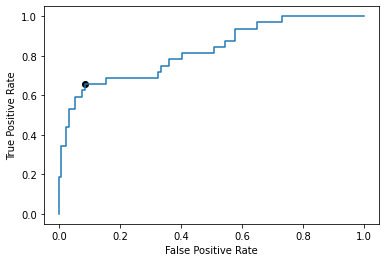

In [118]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold value is:", optimal_threshold)

plt.plot(fpr,tpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [137]:
y_pred = (clf.predict_proba(X_test)[:,1]>=optimal_threshold).astype(int)

	  Confusion Matrix


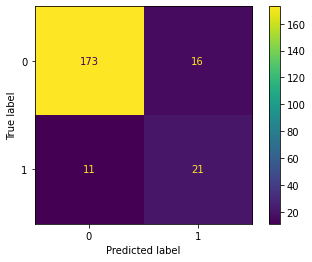

Accuracy: 0.8778280542986425


In [138]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("\t  Confusion Matrix")
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 


# SVM 

In [139]:
from sklearn import svm

svm_model = svm.SVC(random_state=SEED, kernel='linear') 
svm_model.fit(X_train, y_train)
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(svm_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
y_pred = cross_val_predict(svm_model, X_test, y_test, cv=5)

print('Accuracy: %.3f Standart Sapma: (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.867 Standart Sapma: (0.021)


	  Confusion Matrix


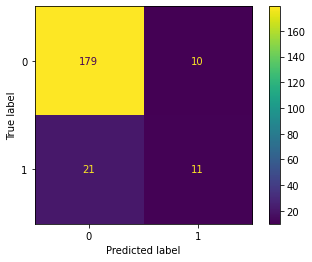

Accuracy: 0.8597285067873304


In [140]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("\t  Confusion Matrix")
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 


# Random Forest 
**Optimal thresholdu logistic reg göre bulduk istersen değiş.**

In [123]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth' : [2, 3, 4, 5, 6, 7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200],
    'max_samples': [100, 240, 480, 720]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit = True, cv = 5)

In [124]:
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

In [141]:
predicted_proba = best_grid.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= optimal_threshold).astype('int')

	  Confusion Matrix


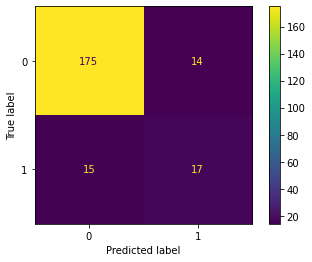

Accuracy: 0.8687782805429864


In [142]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("\t  Confusion Matrix")
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 


# Metrik Raporları

	  Confusion Matrix - Logistic Regression


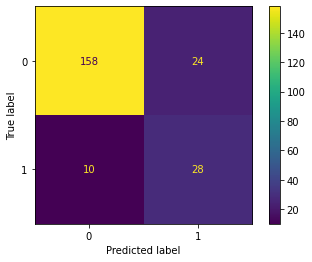

Accuracy: 0.8454545454545455
Precision: 0.5384615384615384
Recall: 0.7368421052631579
F1 Score: 0.6222222222222222


In [127]:
valid_pred_logistic_reg = (clf.predict_proba(X_validation)[:,1]>=optimal_threshold).astype(int)
confusion_matrix = metrics.confusion_matrix(y_validation, valid_pred_logistic_reg) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("\t  Confusion Matrix - Logistic Regression")
plt.show()
print("Accuracy:",metrics.accuracy_score(y_validation, valid_pred_logistic_reg)) 
print("Precision:",metrics.precision_score(y_validation, valid_pred_logistic_reg)) 
print("Recall:",metrics.recall_score(y_validation, valid_pred_logistic_reg))
print("F1 Score:",metrics.f1_score(y_validation, valid_pred_logistic_reg))


	  Confusion Matrix - SVM


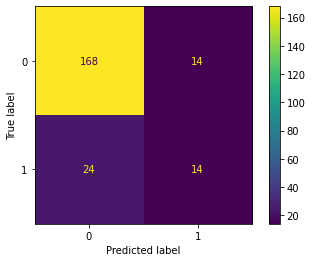

Accuracy: 0.8272727272727273
Precision: 0.5
Recall: 0.3684210526315789
F1 Score: 0.4242424242424242


In [128]:
valid_pred_svm = cross_val_predict(svm_model, X_validation, y_validation, cv=5)
confusion_matrix = metrics.confusion_matrix(y_validation, valid_pred_svm) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("\t  Confusion Matrix - SVM")
plt.show()
print("Accuracy:",metrics.accuracy_score(y_validation, valid_pred_svm)) 
print("Precision:",metrics.precision_score(y_validation, valid_pred_svm)) 
print("Recall:",metrics.recall_score(y_validation, valid_pred_svm))
print("F1 Score:",metrics.f1_score(y_validation, valid_pred_svm))


	Confusion Matrix - Random Forest


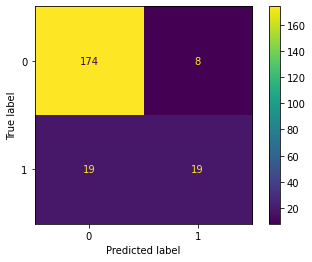

Accuracy: 0.8772727272727273
Precision: 0.7037037037037037
Recall: 0.5
F1 Score: 0.5846153846153846


In [129]:
predicted_proba_random_forest = best_grid.predict_proba(X_validation)
valid_pred_random_forest = (predicted_proba_random_forest [:,1] >= optimal_threshold).astype('int')
confusion_matrix = metrics.confusion_matrix(y_validation, valid_pred_random_forest) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
print("\tConfusion Matrix - Random Forest")
plt.show()
print("Accuracy:",metrics.accuracy_score(y_validation, valid_pred_random_forest)) 
print("Precision:",metrics.precision_score(y_validation, valid_pred_random_forest)) 
print("Recall:",metrics.recall_score(y_validation, valid_pred_random_forest))
print("F1 Score:",metrics.f1_score(y_validation, valid_pred_random_forest))

# Overfit control